In [2]:
library("cluster")
library("FactoMineR")

In [75]:
data(decathlon)
X=decathlon[,1:10]

Le jeu de données décathlon correspond aux résultats aux  ́epreuves du décathlon lors de deux compétitions d’adathlétisme. Le jeu de données contient 41 individus (athlétes) décrit par 13 variables (Performance aux 10 épreuves, classement final, nombre de points final et nom de la compétition). On va s'intéresser uniquement aux 10 premières variables. Nous allons effectuer une classification hiérarchique sur ce jeu de données

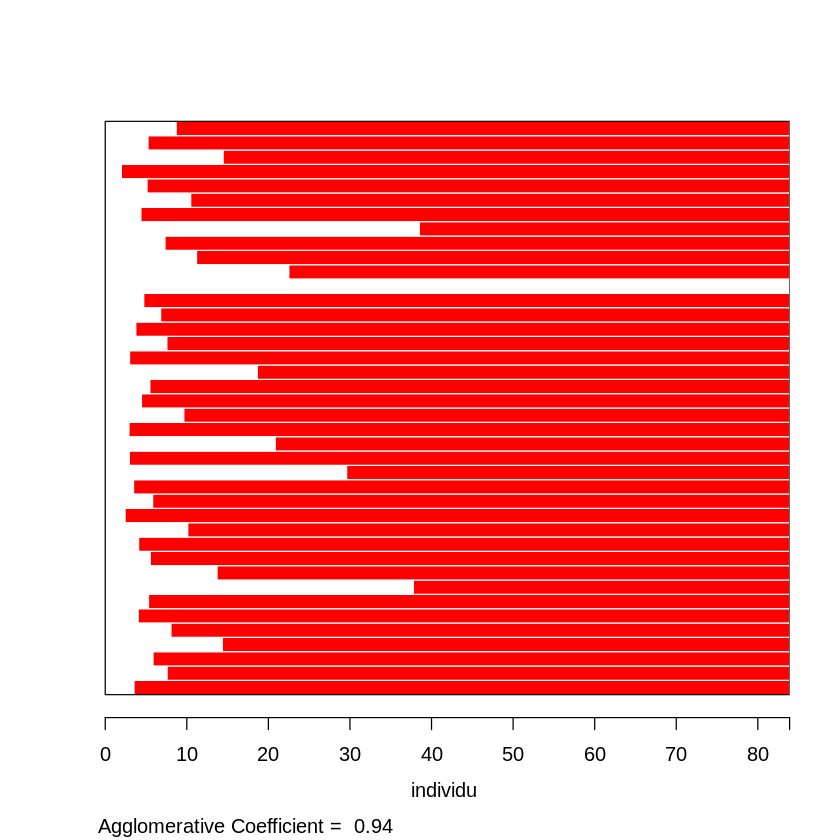

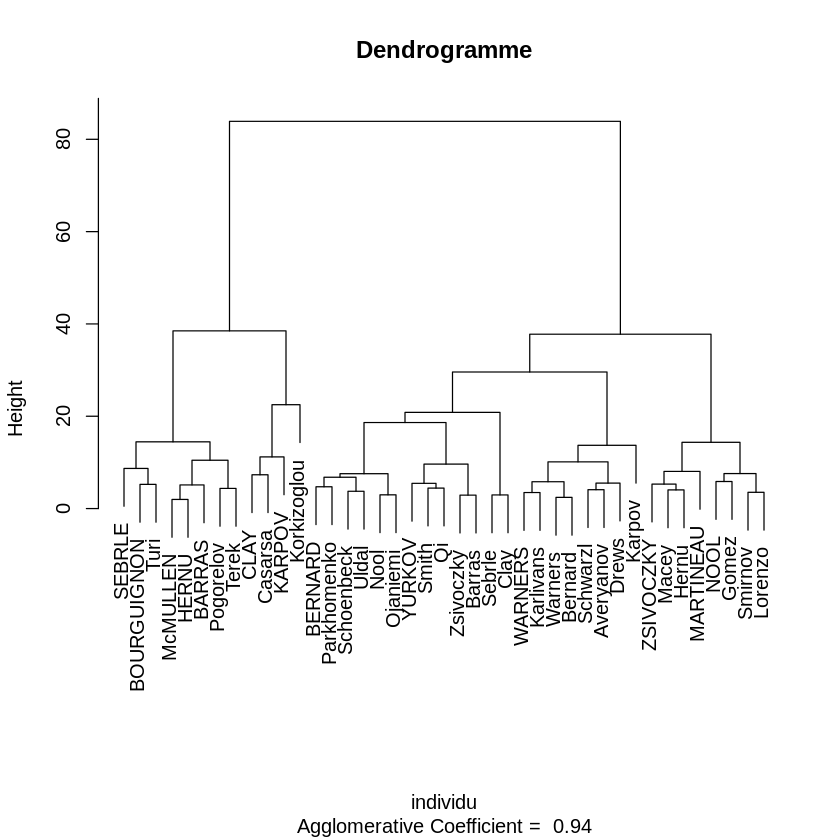

In [19]:
#Classification hiérarchique avec agnes
classif<-agnes(X, method="ward")
plot(classif,xlab="individu",main="")
title("Dendrogramme")

Nous allons également essayer hclust mais cette fois ci en introduisant une matrice de dissimilarité

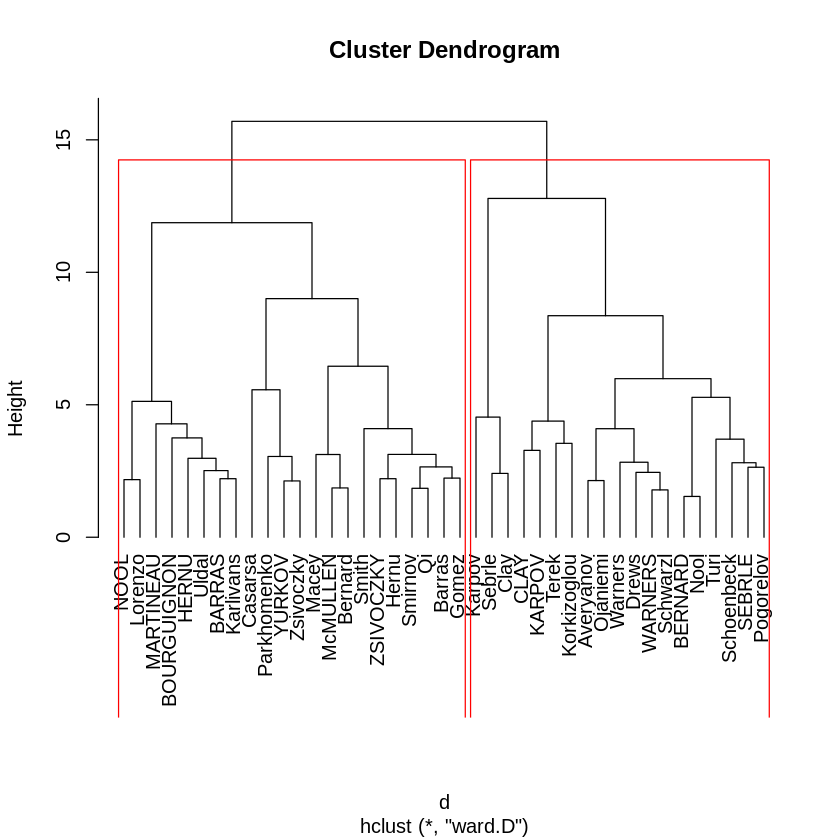

In [41]:
d=dist(scale(X),method = "euclidian")
hc1=hclust(d,method = "ward.D")
plot(hc1, hang = -1)
rect.hclust(hc1,k=2)

In [29]:
# Output de hclust
hc1$dist.method
hc1$method
hc1$height
hc1$order## Ordre des indivuds sur le dendogramme
hc1$merge## Déroulement du processus d’aggrégation.

[1] "euclidean"

[1] "ward.D"

[1]  1.540179  1.786728  1.847983  1.861624  2.126049  2.139540  2.175623
 [8]  2.209737  2.209937  2.232079  2.410366  2.449939  2.516253  2.642745
[15]  2.655432  2.812715  2.831231  2.980268  3.049226  3.123398  3.127208
[22]  3.279692  3.545084  3.702645  3.750847  4.097899  4.099878  4.281608
[29]  4.384339  4.534899  5.128260  5.281110  5.567909  5.986279  6.456138
[36]  8.361704  9.006647 11.873450 12.789148 15.698866

[1] 12 37  9 13 10 40 11 38 41 33  5 19 17  8 22 27  7 20 30 31 26 35 16 14 15
[26]  2  3 34 39 28 29 18 32  6 23  4 21 36 25  1 24

-4,-21
-6,-23
-30,-31
-8,-22
-5,-19
-28,-29
-12,-37
-11,-38
-7,-20
-26,-35
-14,-15


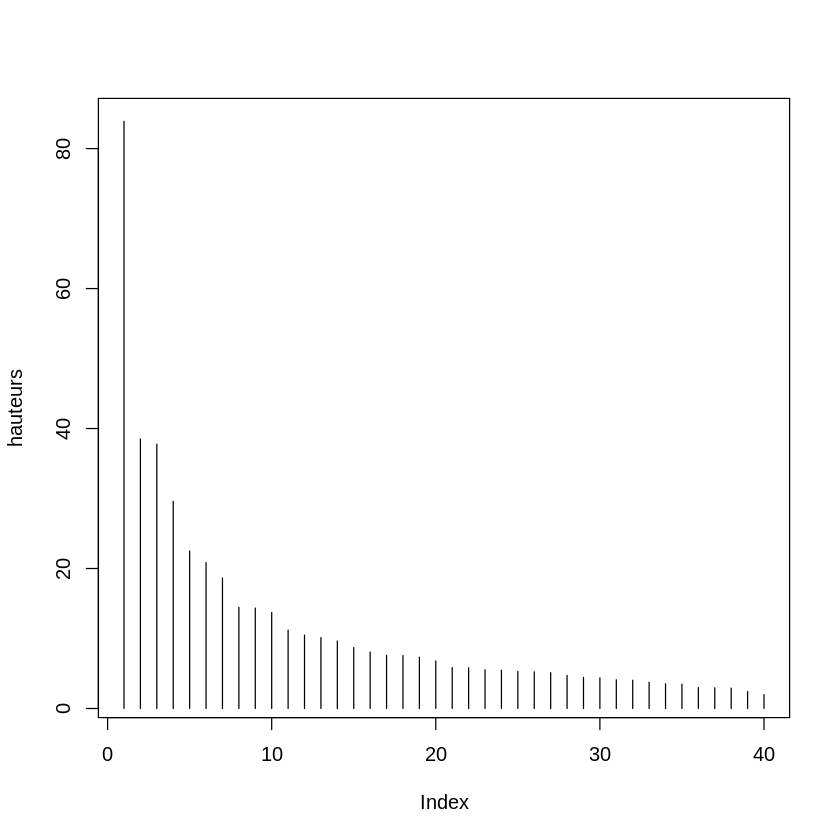

In [42]:
classif2<-as.hclust(classif)
plot(rev(classif2$height), type="h", ylab="hauteurs")

SEBRLE        CLAY      KARPOV     BERNARD      YURKOV     WARNERS 
          1           1           1           2           2           2 
  ZSIVOCZKY    McMULLEN   MARTINEAU       HERNU      BARRAS        NOOL 
          2           1           2           1           1           2 
BOURGUIGNON      Sebrle        Clay      Karpov       Macey     Warners 
          1           2           2           2           2           2 
  Zsivoczky       Hernu        Nool     Bernard    Schwarzl   Pogorelov 
          2           2           2           2           2           1 
 Schoenbeck      Barras       Smith   Averyanov    Ojaniemi     Smirnov 
          2           2           2           2           2           2 
         Qi       Drews Parkhomenko       Terek       Gomez        Turi 
          2           2           2           1           2           1 
    Lorenzo   Karlivans Korkizoglou       Uldal     Casarsa 
          2           2           1           2           1

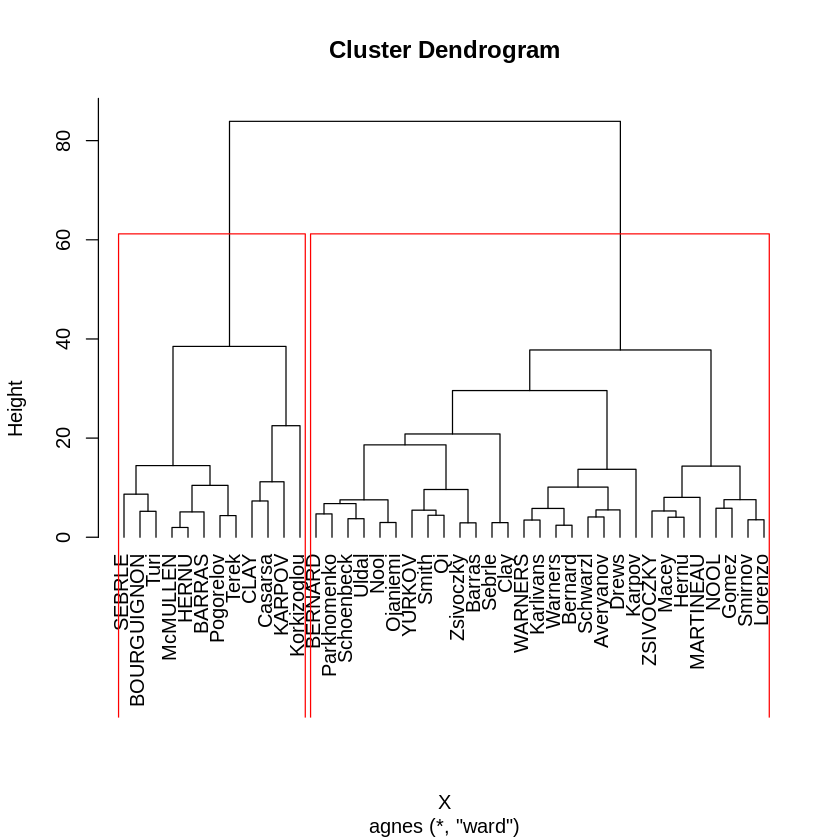

In [43]:
plot(classif2, hang = -1)
rect.hclust(classif2,k=2)
classes<-cutree(classif2,k=2)
classes

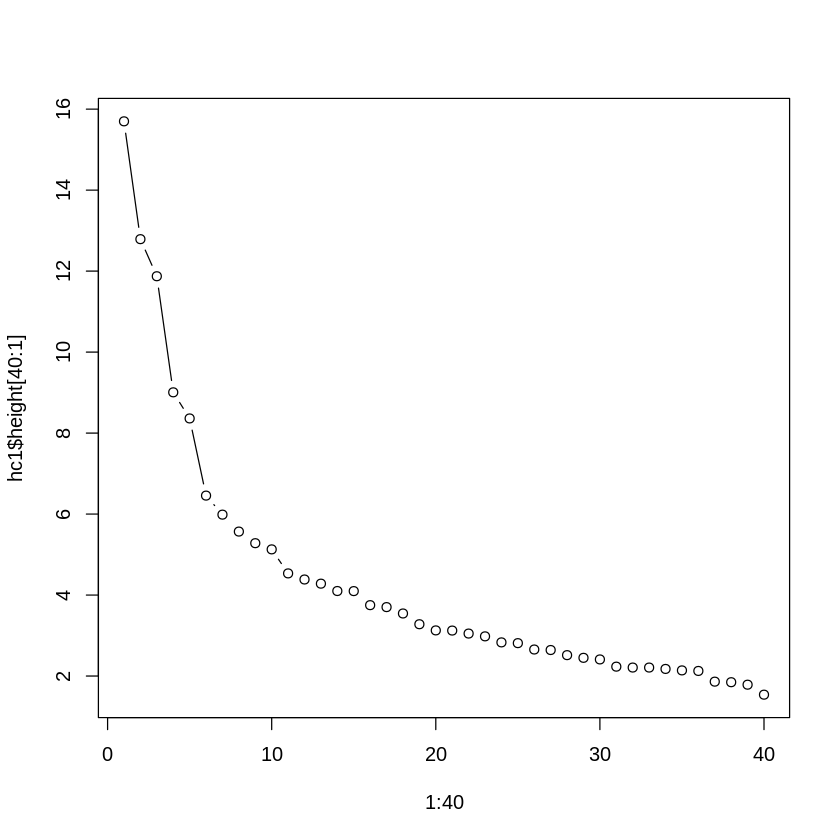

In [46]:
plot(1:40,hc1$height[40:1],type="b")


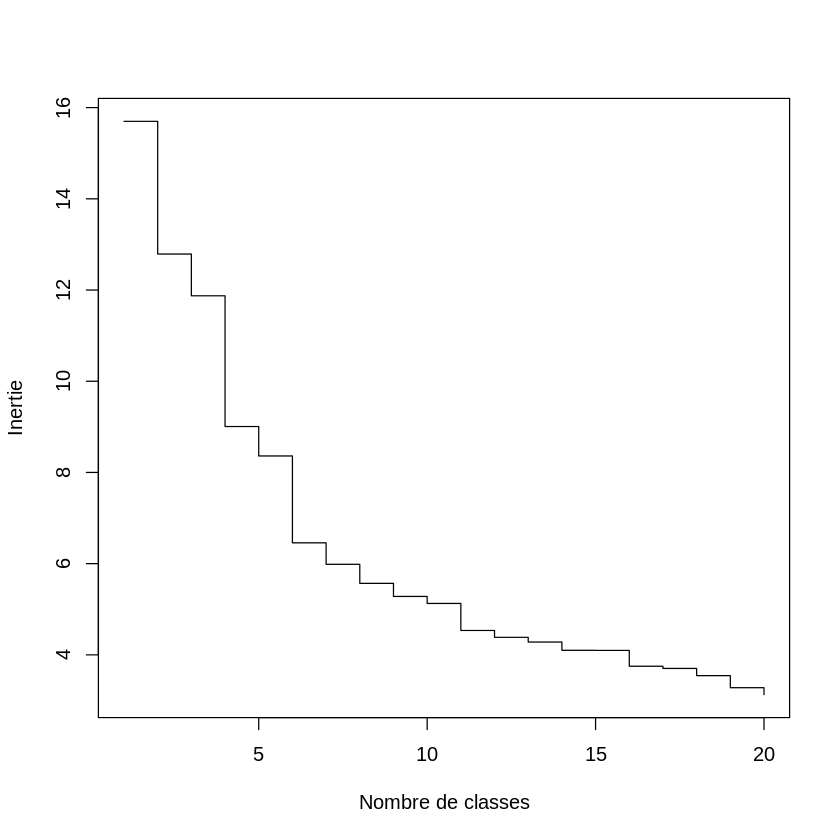

In [48]:
inertie = sort(hc1$height,decreasing=TRUE)
plot(inertie[1:20],type="s",xlab="Nombre de classes", ylab="Inertie")

In [49]:
decathlon.comp<-cbind.data.frame(decathlon, as.factor(classes))
colnames(decathlon.comp)[14]<-"Classe"
head(decathlon.comp)

,100m,Long.jump,Shot.put,High.jump,400m,110m.hurdle,Discus,Pole.vault,Javeline,1500m,Rank,Points,Competition,Classe
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>
SEBRLE,11.04,7.58,14.83,2.07,49.81,14.69,43.75,5.02,63.19,291.7,1,8217,Decastar,1
CLAY,10.76,7.40,14.26,1.86,49.37,14.05,50.72,4.92,60.15,301.5,2,8122,Decastar,1
KARPOV,11.02,7.30,14.77,2.04,48.37,14.09,48.95,4.92,50.31,300.2,3,8099,Decastar,1
BERNARD,11.02,7.23,14.25,1.92,48.93,14.99,40.87,5.32,62.77,280.1,4,8067,Decastar,2
YURKOV,11.34,7.09,15.19,2.10,50.42,15.31,46.26,4.72,63.44,276.4,5,8036,Decastar,2
WARNERS,11.11,7.60,14.31,1.98,48.68,14.23,41.10,4.92,51.77,278.1,6,8030,Decastar,2


In [52]:
res.cat=catdes(decathlon.comp, num.var=14)

In [53]:
res.cat

Link between the cluster variable and the categorical variables (chi-square test)
=================================================================================
               p.value df
Competition 0.01843312  1

Description of each cluster by the categories
=============================================
$`1`
                      Cla/Mod  Mod/Cla   Global    p.value    v.test
Competition=Decastar 53.84615 58.33333 31.70732 0.02864493  2.188339
Competition=OlympicG 17.85714 41.66667 68.29268 0.02864493 -2.188339

$`2`
                      Cla/Mod  Mod/Cla   Global    p.value    v.test
Competition=OlympicG 82.14286 79.31034 68.29268 0.02864493  2.188339
Competition=Decastar 46.15385 20.68966 31.70732 0.02864493 -2.188339


Link between the cluster variable and the quantitative variables
================================================================
               Eta2      P-value
1500m    0.62557513 7.585099e-10
400m     0.22960161 1.526537e-03
Points   0.12331482 2.437106e-02
Javeline 0.09511371 4.978573e-02

Description of each cluster by quantitative variables
=====================================================
$`1`
          v.test Mean in category Overall mean sd in category Overall sd
1500m   5.002300         293.2017    279.02488       9.143682  11.530012
400m    3.030522          50.4650     49.61634       1.242360   1.139298
Points -2.220944        7820.7500   8005.36585     282.262917 338.183942
            p.value
1500m  5.665034e-07
400m   2.441313e-03
Points 2.635475e-02

$`2`
          v.test Mean in category Overall mean sd in category Overall sd
Points  2.220944       8081.75862   8005.36585    329.8275051 338.183942
400m   -3.030522         49.26517     49.61634      0.8803903   1.139298
1500m  -5.002300        273.15862    279.02488      5.9814447  11.530012
            p.value
Points 2.635475e-02
400m   2.441313e-03
1500m  5.665034e-07

In [66]:
#4. Representation des classes sur un plan factoriel
X.comp<-cbind.data.frame(X, as.factor(classes))
colnames(X.comp)[11]<-"Classe"
res.pca<-PCA(X.comp,quali.sup=11)

Warning message:
“ggrepel: 3 unlabeled data points (too many overlaps). Consider increasing max.overlaps”

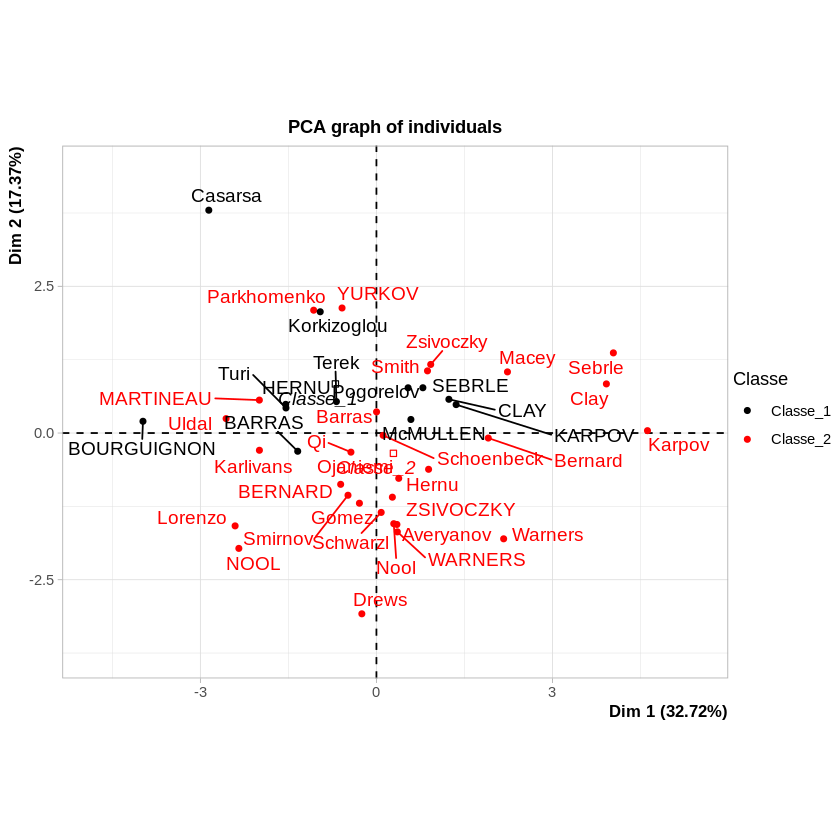

In [67]:
plot(res.pca,choix="ind",habillage=11)

In [81]:
data(decathlon)

In [83]:
res.pca<-PCA(decathlon,quanti.sup=11:12, ncp=Inf, graph=F, quali.sup=13)

In [85]:
res.hcpc<-HCPC(res.pca,consol=FALSE)

[1] "Click on the graph to cut the tree"


ERROR: Error in while (coupe$y < min(t$tree$height)) {: l'argument est de longueur nulle


HCPC ne peut marcher sur JupyterNotebook, nous avons du l'essayer sur Rstudio